In [20]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [21]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed

# Arrays to store the I_nkq and I_nmc values
I_nkq_values = np.zeros([len(seed_numbers), 12])
I_nmc_values = np.zeros([len(seed_numbers), 12])

# Loop over seed numbers and load data
for seed in seed_numbers:
    # Load I_nkq_err_dict
    nkq_file_path = f"/home/zongchen/nest_bq/results/toy/kernel_x_matern__kernel_theta_matern/seed_{seed}__NKQ"
    with open(nkq_file_path, 'rb') as f:
        I_nkq_err_dict = pickle.load(f)
        I_nkq_values[seed, :] = np.array(list(I_nkq_err_dict.values()))  # Add all values to the list
    
    # Load I_nmc_err_dict
    nmc_file_path = f"/home/zongchen/nest_bq/results/toy/kernel_x_matern__kernel_theta_matern/seed_{seed}__NMC"
    with open(nmc_file_path, 'rb') as f:
        I_nmc_err_dict = pickle.load(f)
        I_nmc_values[seed, :] = np.array(list(I_nmc_err_dict.values()))  # Add all values to the list

# Convert lists to numpy arrays for easy computation
I_nkq_array = np.array(I_nkq_values)
I_nmc_array = np.array(I_nmc_values)

# Compute the median and standard deviation
I_nkq_median = np.median(I_nkq_array, axis=0)
I_nkq_q25 = np.percentile(I_nkq_array, 25, axis=0)
I_nkq_q75 = np.percentile(I_nkq_array, 75, axis=0)

I_nmc_median = np.median(I_nmc_array, axis=0)
I_nmc_q25 = np.percentile(I_nmc_array, 25, axis=0)
I_nmc_q75 = np.percentile(I_nmc_array, 75, axis=0)



In [22]:
# Extract the keys
keys = list(I_nkq_err_dict.keys())

# Extract the unique values from the first and second elements of the keys
N_array = np.array(sorted(set([k[0] for k in keys])), dtype=float)
cost_array = N_array ** 2

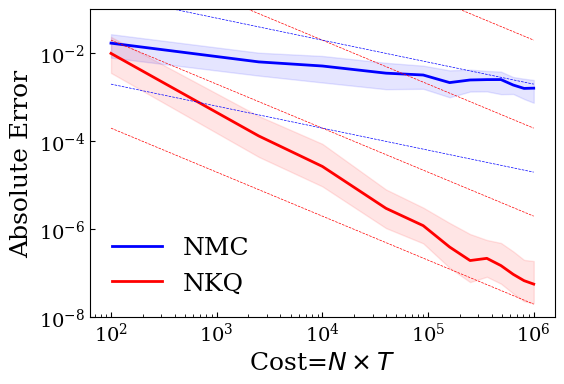

In [23]:
# First, fix N and plot the error as a function of T
theoretical_error_nkq = N_array ** (-2) + N_array ** (-2)
theoretical_error_nmc = N_array ** (-1) + N_array ** (-1)

fig1 = plt.figure(figsize=(6, 4))
plt.grid(False)
plt.plot(cost_array, I_nmc_median, label=f'NMC', color='blue')
plt.fill_between(cost_array, I_nmc_q25, I_nmc_q75, alpha=0.1, color='blue')
plt.plot(cost_array, I_nkq_median, label=f'NKQ', color='red')
plt.fill_between(cost_array, I_nkq_q25, I_nkq_q75, alpha=0.1, color='red')
plt.plot(cost_array, theoretical_error_nkq, linestyle='--', color = 'red', linewidth=0.5)
plt.plot(cost_array, 0.01 * theoretical_error_nkq, linestyle='--', color = 'red', linewidth=0.5)
plt.plot(cost_array, 100 * theoretical_error_nkq, linestyle='--', color = 'red', linewidth=0.5)
plt.plot(cost_array, 1e4 * theoretical_error_nkq, linestyle='--', color = 'red', linewidth=0.5)
plt.plot(cost_array, theoretical_error_nmc, linestyle='--', color = 'blue', linewidth=0.5)
plt.plot(cost_array, 0.01 * theoretical_error_nmc, linestyle='--', color = 'blue', linewidth=0.5)
plt.plot(cost_array, 100 * theoretical_error_nmc, linestyle='--', color = 'blue', linewidth=0.5)
plt.plot(cost_array, 1e4 * theoretical_error_nmc, linestyle='--', color = 'blue', linewidth=0.5)
plt.xlabel(r'Cost=$N \times T$')
plt.ylabel('Absolute Error')
plt.ylim([1e-8, 0.1])
plt.yscale('log')
plt.xscale('log')
plt.legend()

